### Data Preprocessing

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 1 min

In [52]:
dt_signal_1 = np.load('workspace/data/dt_signal_1.npy') # 1 min ppg

In [53]:
lb_list = np.load('workspace/data/lb_list.npy')

In [54]:
data = list(dt_signal_1)

In [55]:
df = pd.DataFrame(data)

In [56]:
label = list(lb_list)

In [57]:
df['label'] = label

In [58]:
df 
# label : -1 down, 0 norm , 1 up 
# 0 norm
# -1, 1, abnorm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,25.309900,23.729900,22.940001,22.545000,22.545000,22.545000,24.124901,26.099800,29.259701,33.209499,...,50.193802,52.563702,55.328602,57.303501,58.488400,58.488400,58.488400,57.698502,56.513500,-1.0
1,49.008801,46.243999,43.479099,40.714199,39.134300,37.159401,35.579399,33.999500,32.814499,31.234600,...,28.864700,26.889799,26.099800,24.914900,24.124901,22.940001,22.150000,21.360001,20.965099,-1.0
2,33.209499,30.839600,30.444599,29.259701,28.074800,26.889799,26.494801,24.914900,24.124901,24.124901,...,23.334999,23.334999,22.940001,23.729900,24.914900,28.074800,31.234600,35.184399,39.529301,-1.0
3,32.814499,32.419601,31.234600,30.444599,29.259701,28.074800,26.889799,26.099800,25.704901,25.309900,...,27.284800,26.889799,26.494801,26.494801,26.099800,26.099800,26.494801,26.099800,26.889799,0.0
4,33.209499,32.419601,30.839600,29.259701,28.074800,26.889799,26.099800,26.099800,25.704901,24.914900,...,25.309900,25.309900,24.914900,24.519899,24.519899,24.124901,24.124901,24.519899,24.914900,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,38.739300,39.134300,39.529301,39.529301,39.134300,39.134300,38.344299,37.949299,37.949299,37.554298,...,39.529301,38.739300,38.344299,37.949299,37.554298,37.159401,37.159401,37.159401,37.554298,-1.0
656,36.764400,36.764400,36.369400,36.764400,36.764400,36.764400,36.369400,36.369400,36.369400,35.974400,...,37.159401,37.159401,36.764400,37.159401,37.159401,37.554298,37.949299,38.739300,39.924198,-1.0
657,37.159401,37.554298,37.554298,37.554298,37.949299,38.344299,38.344299,38.739300,38.739300,38.344299,...,37.554298,37.554298,37.554298,37.554298,37.949299,38.344299,37.949299,37.949299,37.554298,-1.0
658,36.764400,36.764400,36.764400,37.159401,37.554298,37.554298,37.554298,37.554298,37.949299,37.949299,...,36.369400,36.764400,37.159401,37.554298,37.949299,38.344299,39.134300,39.134300,39.134300,0.0


In [59]:
df['label'].value_counts()

 0.0    444
-1.0    209
 1.0      7
Name: label, dtype: int64

* bandpass filter

In [60]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 0.5 ~ 15 hz
lowcut = 0.5
highcut = 15

* ex

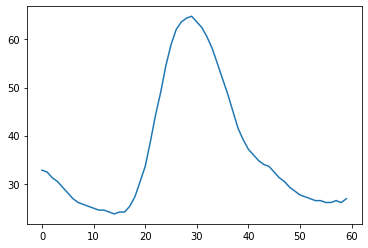

In [61]:
plt.plot(df[df['label'] == 0].iloc[0][:-1])

In [62]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[0][:-1], lowcut, highcut, 100, order=5)

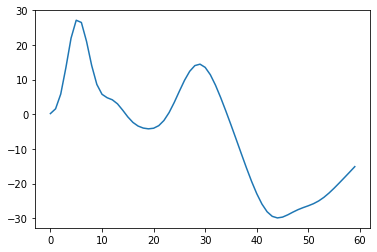

In [63]:
plt.plot(yy)

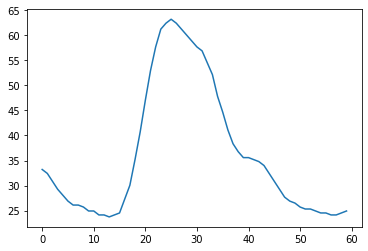

In [64]:
plt.plot(df[df['label'] == 0].iloc[1][:-1])

In [65]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[1][:-1], lowcut, highcut, 100, order=5)

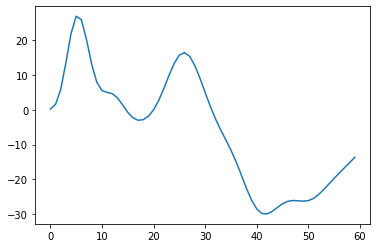

In [66]:
plt.plot(yy)

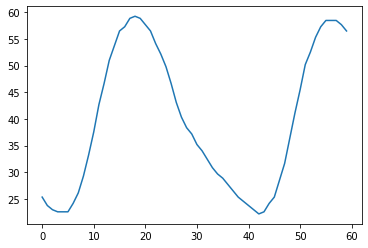

In [67]:
plt.plot(df[df['label'] == -1].iloc[0][:-1])

In [68]:
yy = butter_bandpass_filter(df[df['label'] == -1].iloc[0][:-1], lowcut, highcut, 100, order=5)

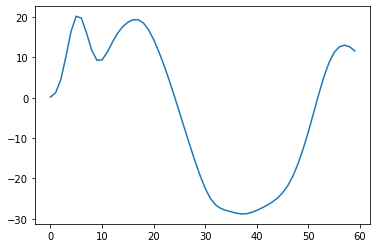

In [69]:
plt.plot(yy)

* filtering

In [70]:
dt_signal_1_bp = []
for i in dt_signal_1:
    yy = butter_bandpass_filter(i, lowcut, highcut, 100, order=5)
    dt_signal_1_bp.append(yy)

In [71]:
dt_signal_1

array([[25.30990028, 23.72990036, 22.94000053, ..., 58.48839951,
        57.69850159, 56.51350021],
       [49.00880051, 46.24399948, 43.47909927, ..., 22.14999962,
        21.36000061, 20.96509933],
       [33.20949936, 30.83959961, 30.44459915, ..., 31.23460007,
        35.18439865, 39.52930069],
       ...,
       [37.15940094, 37.5542984 , 37.5542984 , ..., 37.94929886,
        37.94929886, 37.5542984 ],
       [36.76440048, 36.76440048, 36.76440048, ..., 39.13430023,
        39.13430023, 39.13430023],
       [44.66400146, 50.58879852, 56.90850067, ..., 35.97439957,
        42.68909836, 47.82389832]])

In [72]:
dt_signal_1_bp

[array([  0.15285625,   1.20765889,   4.43721416,  10.16826881,
         16.46232883,  20.21675022,  19.75411168,  16.07307647,
         11.8224495 ,   9.33178175,   9.36885387,  11.24313712,
         13.73652009,  15.95820332,  17.60495253,  18.71987425,
         19.34491644,  19.36190319,  18.57604354,  16.90547616,
         14.46692045,  11.47749369,   8.10927493,   4.44567984,
          0.53609658,  -3.53485128,  -7.64046129, -11.67433791,
        -15.576783  , -19.24853055, -22.46204406, -24.93786688,
        -26.54955067, -27.43798083, -27.91828131, -28.27412945,
        -28.60150107, -28.8095342 , -28.76645679, -28.44547672,
        -27.93346921, -27.32667276, -26.64871547, -25.85892439,
        -24.88331685, -23.60006851, -21.83692782, -19.44296398,
        -16.36570438, -12.65386874,  -8.42132557,  -3.84640376,
          0.79460309,   5.12001406,   8.7087505 ,  11.24392415,
         12.6424997 ,  13.03817338,  12.64040221,  11.62333743]),
 array([  0.29598305,   2.34022849,   

In [73]:
data = list(dt_signal_1_bp)

In [74]:
label = list(lb_list)

In [75]:
df = pd.DataFrame(data)

In [76]:
df['label'] = label

In [77]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,0.152856,1.207659,4.437214,10.168269,16.462329,20.216750,19.754112,16.073076,11.822449,9.331782,...,-3.846404,0.794603,5.120014,8.708750,11.243924,12.642500,13.038173,12.640402,11.623337,-1.0
1,0.295983,2.340228,8.598704,19.670420,31.672685,38.390829,36.426069,27.689619,17.297760,9.615265,...,-24.358280,-24.258697,-23.900612,-23.380444,-22.809447,-22.220908,-21.560694,-20.761766,-19.803739,-1.0
2,0.200565,1.582795,5.811737,13.315787,21.552751,26.406860,25.543467,20.082291,13.308122,8.113716,...,-23.883419,-22.860993,-21.829658,-20.633078,-19.125142,-17.234369,-14.905740,-12.036658,-8.528704,-1.0
3,0.198179,1.575727,5.831438,13.469005,21.979702,27.159539,26.515638,21.057304,14.080877,8.618767,...,-25.825592,-25.038767,-24.012945,-22.760573,-21.341561,-19.829668,-18.281942,-16.719442,-15.130330,0.0
4,0.200565,1.592337,5.880566,13.538452,21.977119,26.923732,25.922670,20.148528,13.098625,7.897733,...,-25.500891,-24.379212,-22.922554,-21.324036,-19.721812,-18.174195,-16.678193,-15.198913,-13.689112,0.0


In [96]:
def ohe(x):
    if x == 0.0:
        return [0, 0, 0]
    elif x == -1.0:
        return  [0, 0, 1]
    else:
        return [1, 0, 0]


In [98]:
df['label'] = df['label'].map(lambda x : ohe(x))

In [99]:
df_drop = df.dropna()

In [100]:
raw_data_norm = df_drop.values

In [101]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

### Conv

In [102]:
from pyts.image import MarkovTransitionField
transformer = MarkovTransitionField()

In [103]:
train_img = transformer.transform(data)

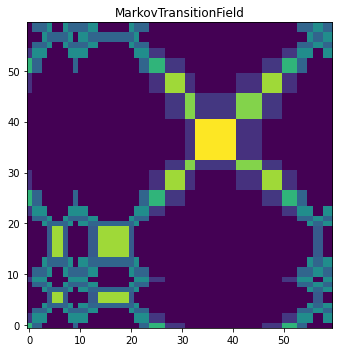

In [104]:
plt.figure(figsize=(5, 5))
plt.imshow(train_img[0], origin='lower')
plt.title('MarkovTransitionField')
plt.tight_layout()
plt.show()

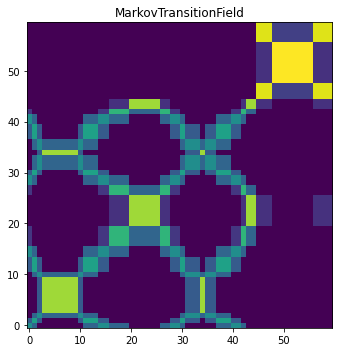

In [105]:
plt.figure(figsize=(5, 5))
plt.imshow(train_img[1], origin='lower')
plt.title('MarkovTransitionField')
plt.tight_layout()
plt.show()

In [106]:
len(train_img[0])

60

In [107]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_vggnet(in_shape=(60, 60, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)
    
    # Block 1
    x = Conv2D(6, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(6, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(6, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(6, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), (2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(16, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = MaxPooling2D((2, 2), name='block3_pool')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 3, activation = 'relu')(x)
    x = Dropout(0.5)(x)

    # 마지막 softmax 층 적용. 
    output = Dense(units = n_classes, activation = 'softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

In [108]:
model = create_vggnet(in_shape=(60, 60, 3), n_classes=3)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 60, 60, 6)         168       
                                                                 
 block1_conv2 (Conv2D)       (None, 60, 60, 6)         330       
                                                                 
 block1_pool (MaxPooling2D)  (None, 30, 30, 6)         0         
                                                                 
 block2_conv1 (Conv2D)       (None, 30, 30, 6)         330       
                                                                 
 block2_conv2 (Conv2D)       (None, 30, 30, 6)         330       
                                                                 
 block2_pool (MaxPooling2D)  (None, 15, 15, 6)         0   

In [109]:
IMAGE_SIZE = 60
BATCH_SIZE = 8

In [110]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [111]:
train_x_rgb = []
for dt in train_img:
  train_x_rgb.append(np.array([dt, dt, dt]).reshape(60, 60, 3))

In [115]:
labels_re = []
for i in labels:
    labels_re.append(i)

In [117]:
train_x = np.asarray(train_x_rgb)
train_y = np.asarray(labels_re)

In [120]:
history = model.fit(x=train_x, y=train_y, epochs=1000, 
                    batch_size=BATCH_SIZE)

Epoch 1/1000
80/80 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6881
Epoch 2/1000
80/80 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6881
Epoch 3/1000
80/80 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6881
Epoch 4/1000
80/80 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6881
Epoch 5/1000
80/80 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6881
Epoch 6/1000
80/80 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6881
Epoch 7/1000
80/80 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6881
Epoch 8/1000
80/80 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6881
Epoch 9/1000
80/80 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6881
Epoch 10/1000
80/80 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6881
Epoch 11/1000
80/80 [========